# Import Libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [6]:
data = pd.read_csv(r"E:\IMPORTANT STUFF\PYTHON\PYTHON CODES\Boston Housing project\archive (1)\BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
data.rename(columns={"medv":"Price"},inplace=True)

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Analyzing the Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Check missing values

In [11]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

# EDA

## Coorelation - how the features are coorelation

In [12]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Removal of "Multicollinearity" - remove one of the dependent or independent feature if those 2 are highly negatively or positively correlated

Check for Outliers

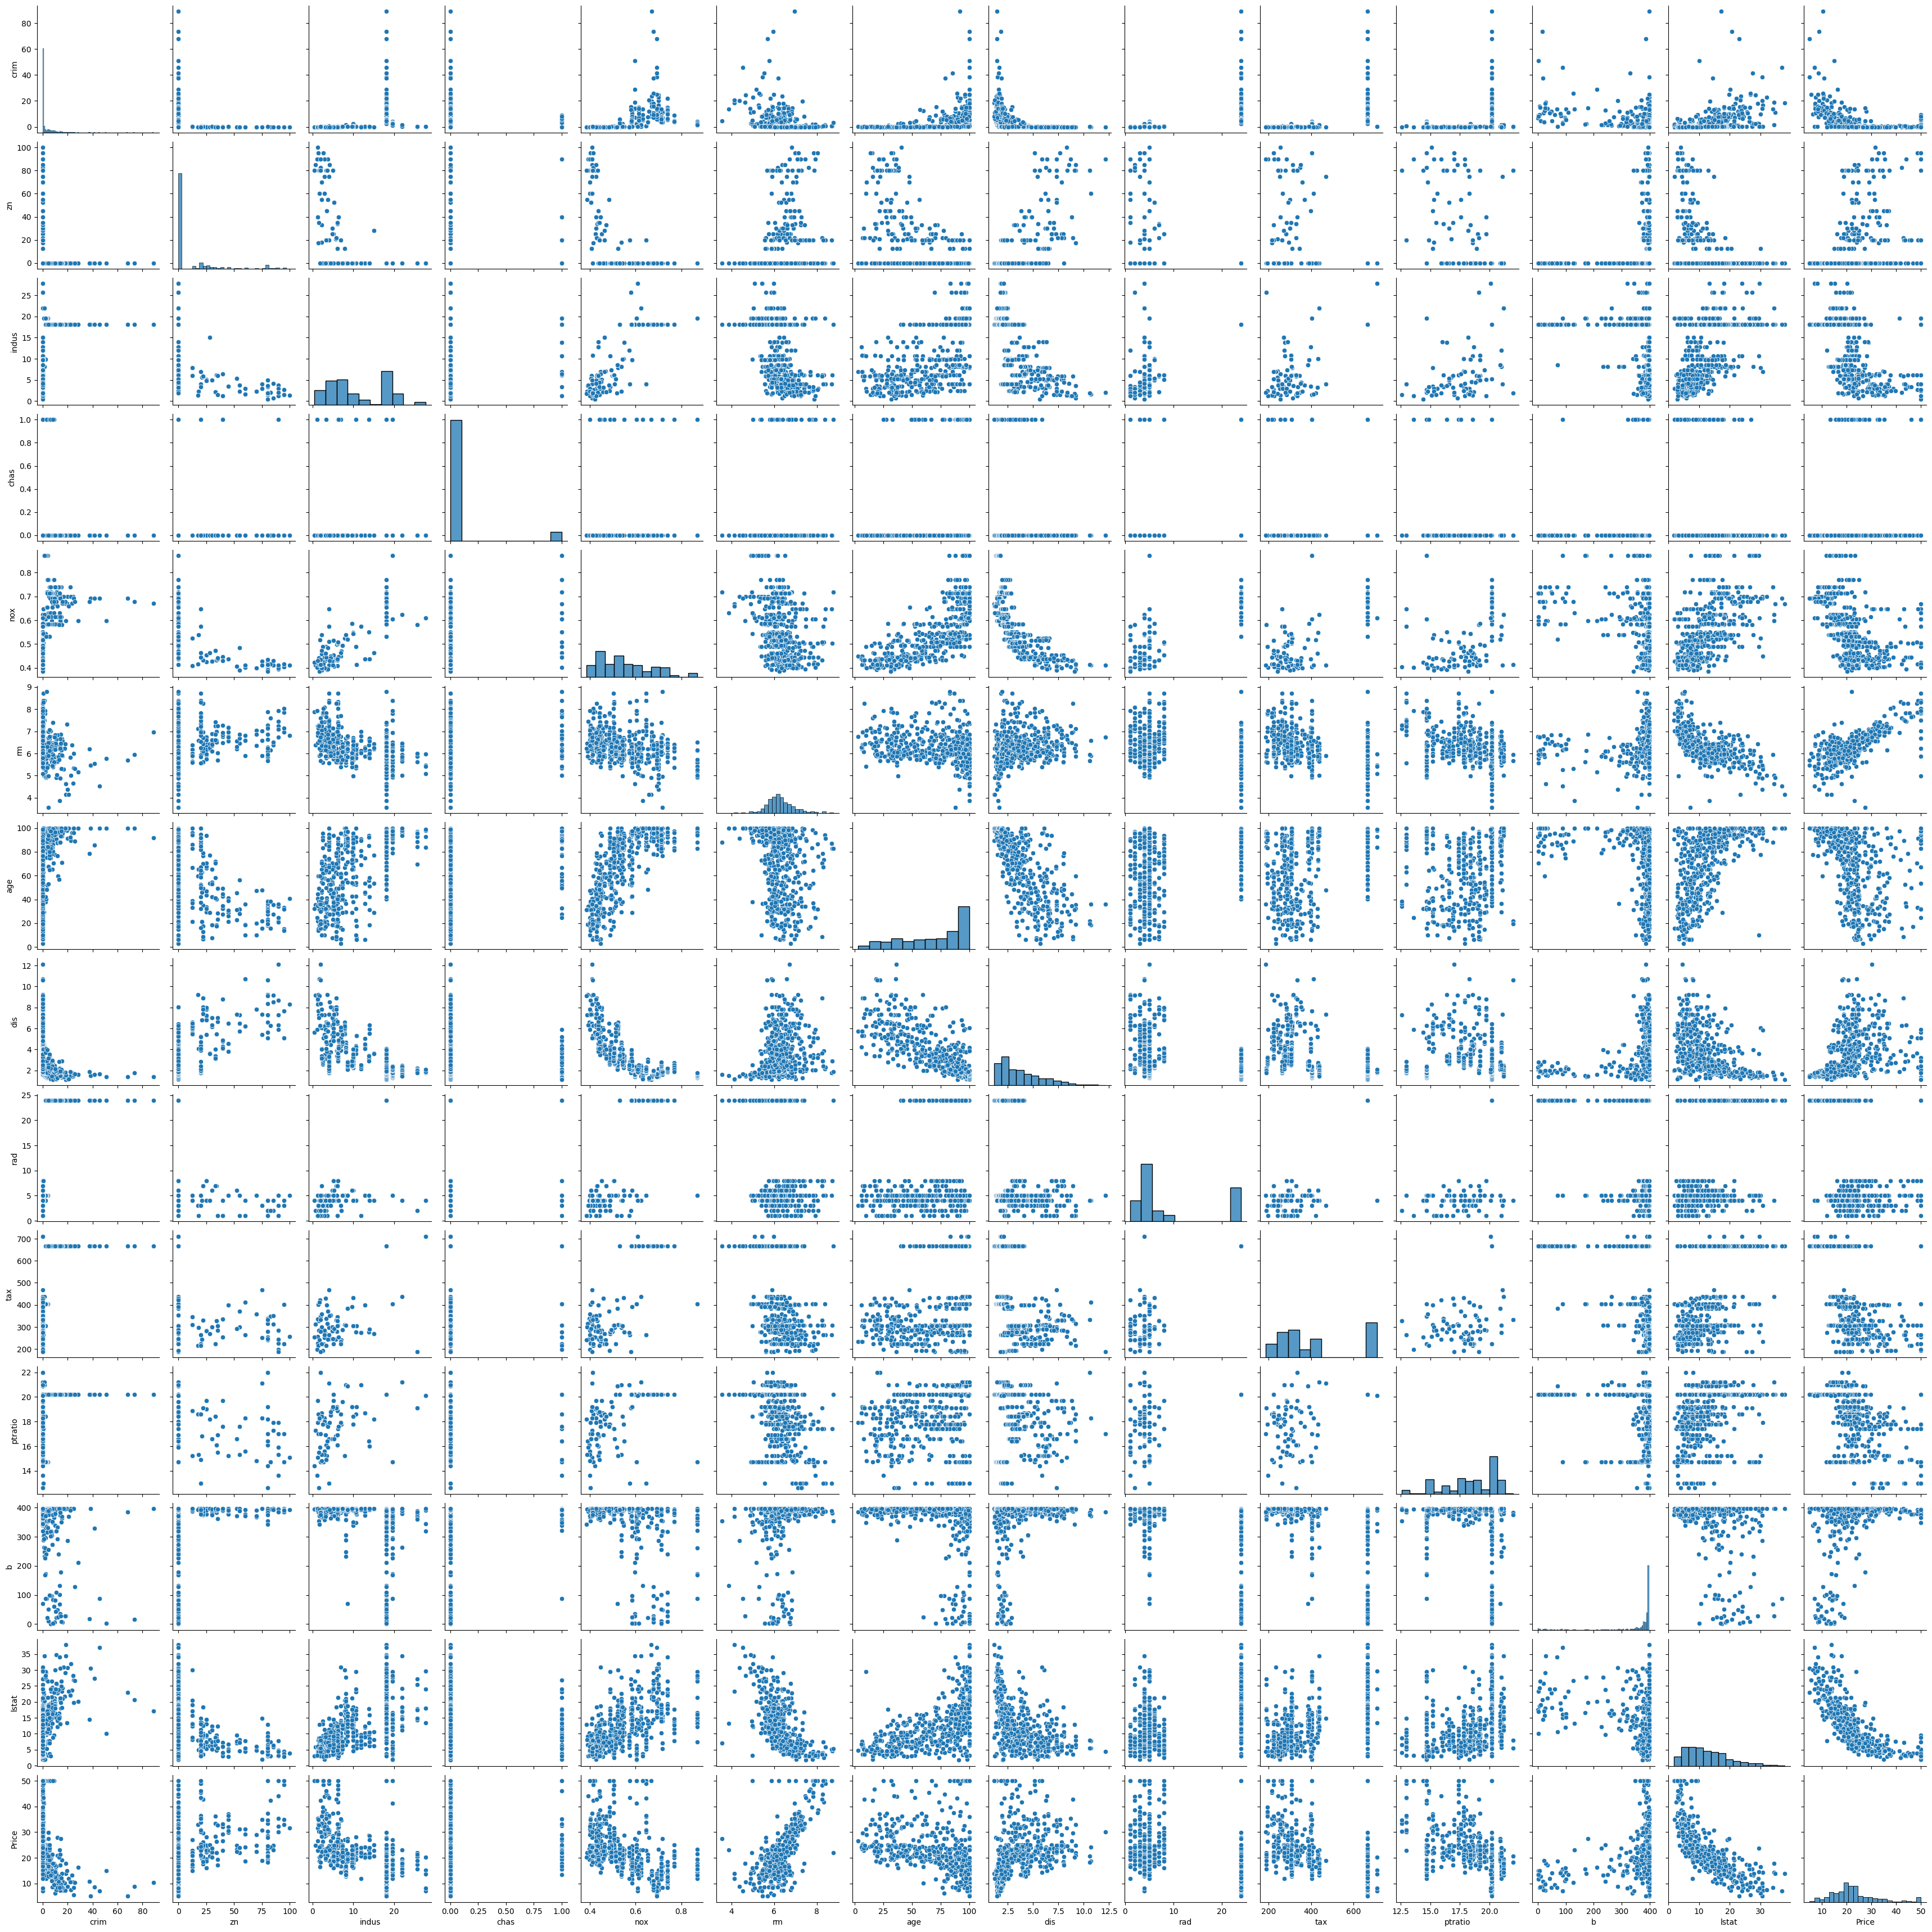

In [13]:
sns.pairplot(data)

Text(0, 0.5, 'Price')

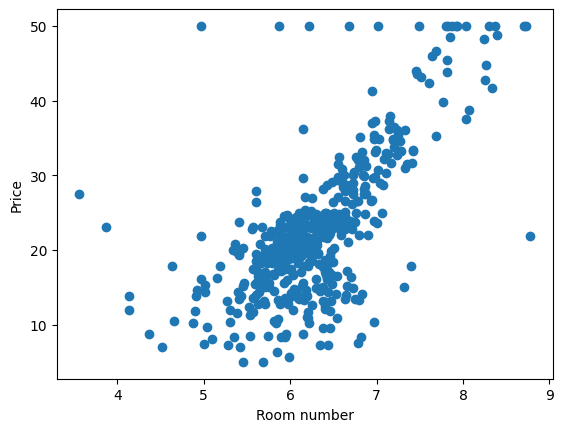

In [14]:
# REgular scatter plot : RM vs Price

plt.scatter(x=data["rm"],y=data["Price"])
plt.xlabel("Room number")
plt.ylabel("Price")


Text(0, 0.5, 'Price')

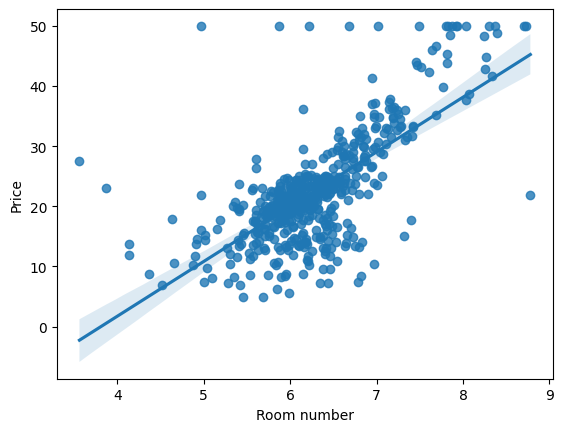

In [15]:
# Regression plot : RM vs Price

sns.regplot(x=data["rm"],y=data["Price"])
plt.xlabel("Room number")
plt.ylabel("Price")


Text(0, 0.5, 'Price')

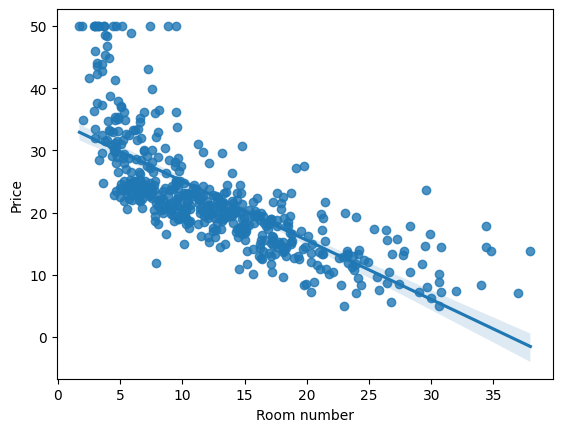

In [16]:
# Regression plot : Lstat vs Price

sns.regplot(x=data["lstat"],y = data["Price"])
plt.xlabel("Room number")
plt.ylabel("Price")


# Creating the Model

## Creating Independent and Dependent Features

In [17]:
# My method

"""
all_cols = (data.columns).to_list()
ind_features = all_cols[0:len(all_cols) - 1]
dep_features = all_cols[len(all_cols)-1]
X = data[ind_features]
Y = data[dep_features]
"""

'\nall_cols = (data.columns).to_list()\nind_features = all_cols[0:len(all_cols) - 1]\ndep_features = all_cols[len(all_cols)-1]\nX = data[ind_features]\nY = data[dep_features]\n'

In [18]:
X = data.iloc[: , :-1]
Y = data.iloc[ : , -1]

In [19]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [20]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

## Train , Test split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=69,test_size=0.3)


In [22]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
6,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
23,0.98843,0.0,8.14,0,0.5380,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
187,0.07875,45.0,3.44,0,0.4370,6.782,41.1,3.7886,5,398,15.2,393.87,6.68
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
211,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.04684,0.0,3.41,0,0.4890,6.417,66.1,3.0923,2,270,17.8,392.18,8.81
107,0.13117,0.0,8.56,0,0.5200,6.127,85.2,2.1224,5,384,20.9,387.69,14.09
457,8.20058,0.0,18.10,0,0.7130,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81


In [23]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
201,0.03445,82.5,2.03,0,0.415,6.162,38.4,6.2700,2,348,14.7,393.77,7.43
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430,16.9,382.44,9.97
381,15.87440,0.0,18.10,0,0.671,6.545,99.1,1.5192,24,666,20.2,396.90,21.08
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45


In [24]:
Y_train

6      22.9
23     14.5
187    32.0
232    41.7
211    19.3
       ... 
90     22.6
107    20.4
457    13.5
203    48.5
54     18.9
Name: Price, Length: 354, dtype: float64

In [25]:
Y_test

95     28.4
57     31.6
452    16.1
201    24.1
0      24.0
       ... 
328    19.3
381    10.9
163    50.0
200    32.9
162    50.0
Name: Price, Length: 152, dtype: float64

## Scaling : to get the features under the same unit

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()       # creating the object

This "scaler" will find and store the parameters required for standardization [mean and stddev] for the training data. We have to immediately transform the training dataset (hence, standardize it).

But for testing data, we are going to use the same parameters (mean and stddev) used to standardize the training data; hence we are going to use ".transform" instead of "fit_transform". If we use "fit_transform" for testing dataset, scaler will find and store new standardization parameters based on the testing data; we dont need that, we need the training data.

In [27]:
# using the object to fit and transform (basically, scale)
# the training dataset and update it.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Now we have to create a pickle file of the standardized X_test.

In [28]:
import pickle
pickle.dump(scaler,open("scaling.pkl",'wb'))

## Model Building

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # model initialization

In [30]:
lr.fit(X_train,Y_train) # model fitting

LinearRegression()

In [31]:
print(lr.coef_) # weights values

[-1.0912553   1.35337229  0.25179048  0.82747745 -2.12009602  2.72805913
  0.01978465 -3.35248673  3.11267125 -2.18523743 -1.87577821  1.16296129
 -3.94942625]


In [32]:
print(lr.intercept_)    # bias value

22.536158192090397


# Model testing

In [33]:
pred = lr.predict(X_test)  # predicting the testing dataset

## Comparing Y_test vs Predicted values

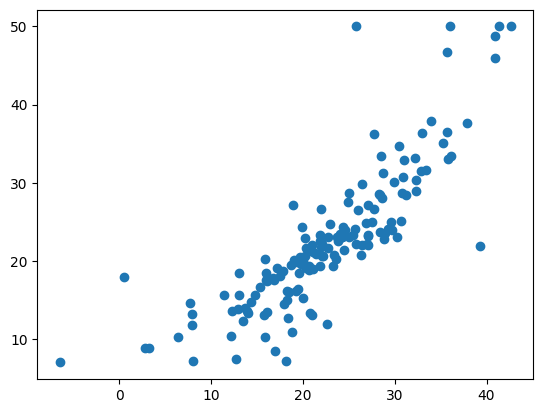

In [34]:
plt.scatter(pred,Y_test)

A linearly-regressed scatter plot says that the model has been trained good and its working.

## Analyzing the errors between Y_test & predicted values

We gotta plot a distribution plot/histplot of the errors between them.

<Axes: xlabel='Price', ylabel='Count'>

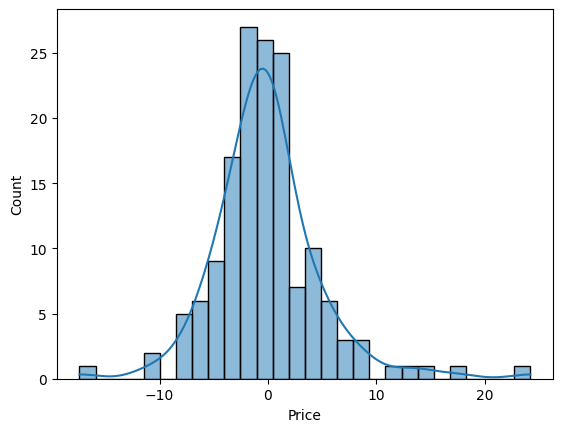

In [35]:
errors = Y_test - pred
sns.histplot(errors,kde=True)

Almost normally distributed. Outliers exist near the right lower side.

### Going for the metrics operations for analyzing the predicted values

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error, r2_score

In [37]:
print("MSE : ", mean_squared_error(Y_test,pred))
print("MAE : ", mean_absolute_error(Y_test,pred))
print("RMSE : ", root_mean_squared_error(Y_test,pred))
print("R squared score : ",r2_score(Y_test,pred))

MSE :  24.326154952243584
MAE :  3.342882615457634
RMSE :  4.93215520358429
R squared score :  0.6927419569015706


## Plotting PRedicted values VS Errors

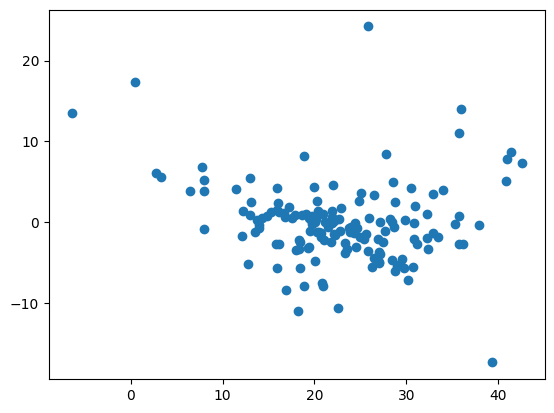

In [38]:
plt.scatter(pred,errors)

# Pickling of the Model file for Deployment

## Mini Model file creation

In [39]:
import pickle

In [40]:
# dumping the regression object into the pickle file named "regModel.pkl"
pickle.dump(lr,open("regModel.pkl","wb"))

My regression function file is created, named as "regModel.pkl"

In [41]:
pickled_lr = pickle.load(open("regModel.pkl","rb"))  # Loading the pickle file, containing the Linear Reg. function file

In [42]:
# predicting the 1st record/row using the pickled file
# Note : make sure to reshape the datasets to be predicted into a 2-D form.
pickled_lr.predict(scaler.transform(X_test[0].reshape(1,-1)))

c:\Users\Trinankur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([53.03388294])

Notice that I have used pickled function to predict, not the usual "lr" function